## Problem Statement:
####  The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not

In [101]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

- total 891 observations and 12 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- there are lots of null values are present there. we will see them later through visualization
- both categorical and numerical features are present in the data
- Pclass is specified as int type but its a categorical feature
- similarly survived is also a categorical feature

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- passengerID is just a serial number so we will not bother about it too much
- survived and pclass are categorical features so we will explore them later
- age is numerical feature. there is not a huge difference between mean and median so the data is not very skewed
- also age data doesnot show any outliers
- there is a huge differnce between mean and median of fare feature so there is some significant amount of skewness

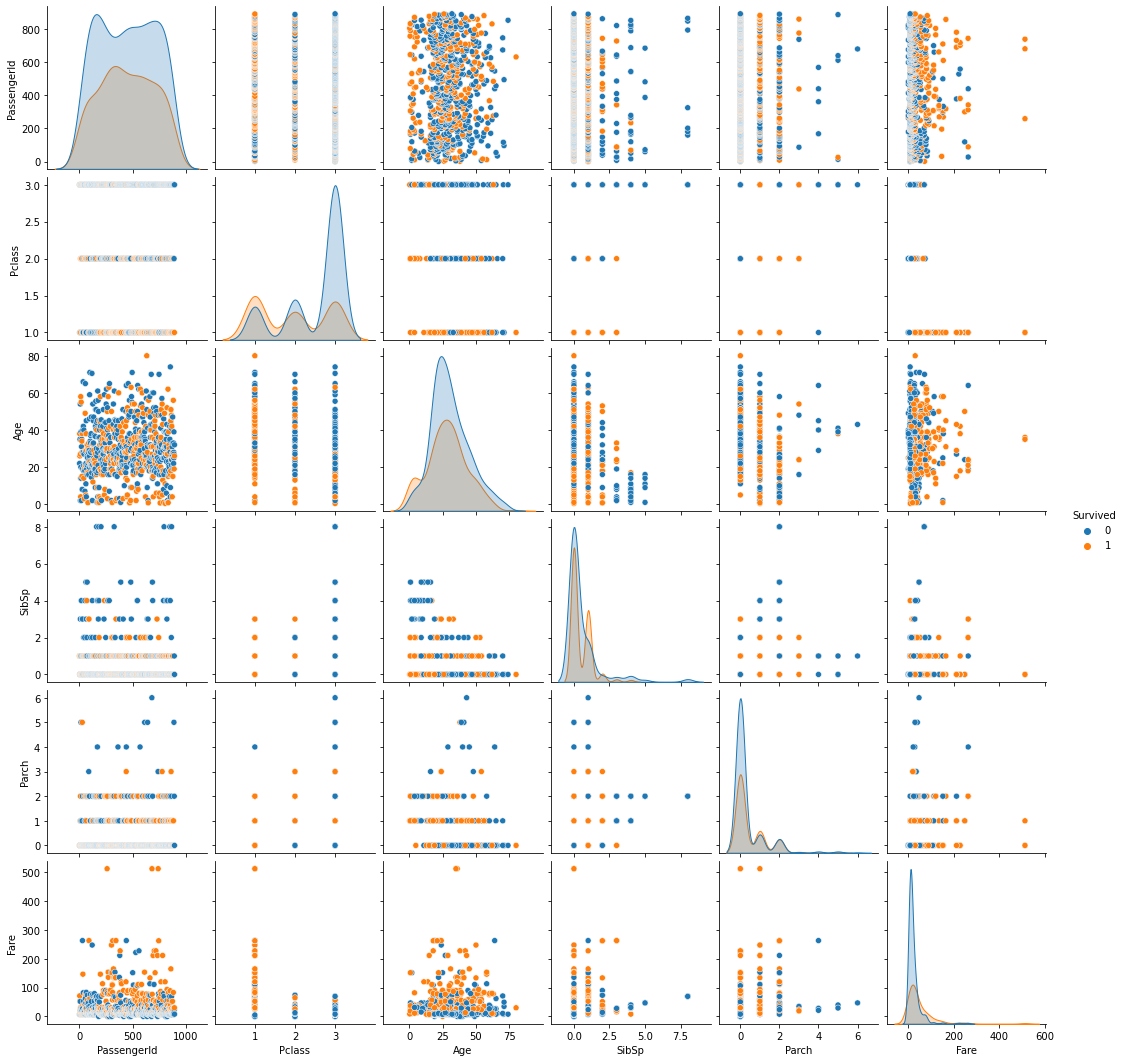

In [6]:
sns.pairplot(df,hue='Survived')

- data shows some skewness in sibsp, parch and fare, although only fare is numerical feature

In [7]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

- huge skewness in fare, we need to remove this skewness

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- there are null values in age, cabin and embarked

<AxesSubplot:xlabel='Cabin', ylabel='count'>

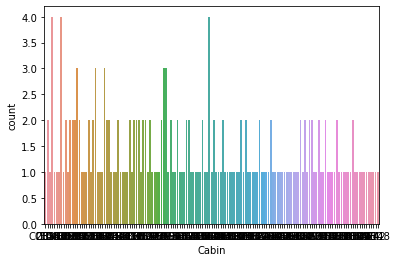

In [9]:
sns.countplot(df.Cabin)

- there are lots of unique values in cabin, so it will be difficult to impute missing values

<AxesSubplot:>

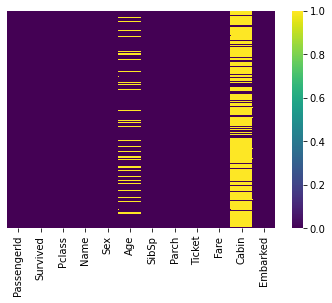

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

#### missing values of cabin are too much, so we may need to drop this column or label it as cabin known 0 or 1. also there are too many unique values 

<AxesSubplot:xlabel='Survived', ylabel='count'>

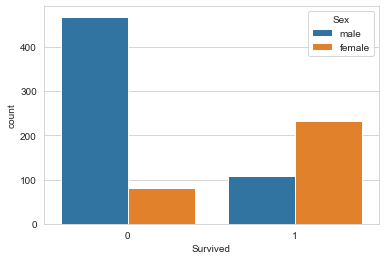

In [11]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue='Sex',data=df)

#### - females are more lucky than males

<AxesSubplot:xlabel='Survived', ylabel='count'>

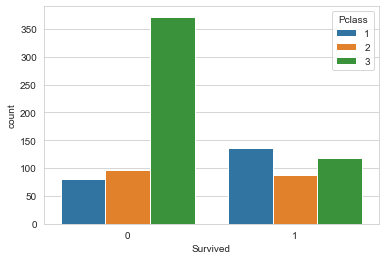

In [12]:
sns.countplot(x="Survived",hue='Pclass',data=df)

#### people of class 3 were not so lucky. passengers of class 1 were richer than those of 3 were not

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

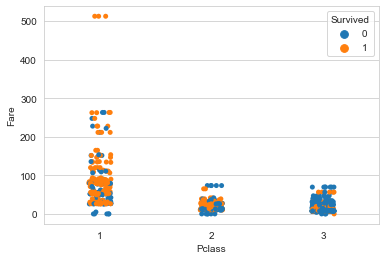

In [13]:
sns.stripplot(x='Pclass',y='Fare',hue='Survived',data=df)

#### fare of class 1 is higher. they were rich... duh!

<AxesSubplot:xlabel='Survived', ylabel='count'>

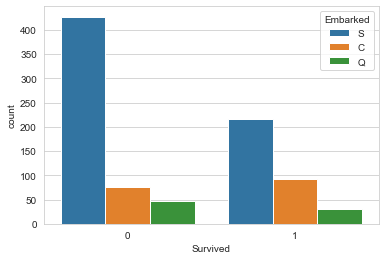

In [14]:
sns.countplot(x='Survived',hue='Embarked',data=df)

#### most of the people died who embarked from southampton although alive are also from southampton

<AxesSubplot:xlabel='SibSp', ylabel='count'>

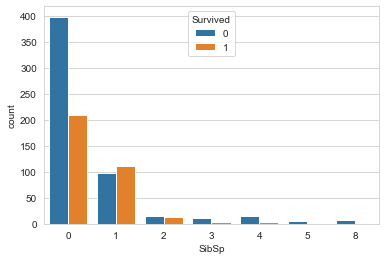

In [15]:
sns.countplot(x='SibSp',hue='Survived',data=df)

#### most of the people had no siblings or spouse, and also most of them were died

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

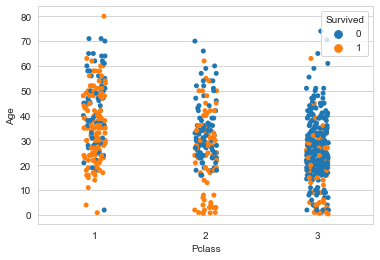

In [16]:
sns.stripplot(x='Pclass',y='Age',hue='Survived',data=df)

- mostly people died from 3rd class as observed before
- most of the young people are from 2nd and 3rd class
- almost all the children below age 10 from 2nd class were alive

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

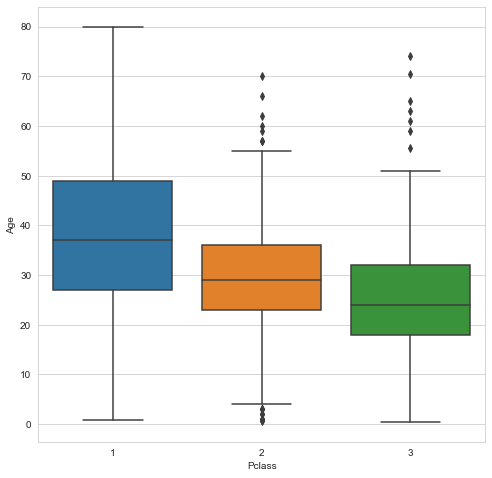

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Pclass',y='Age',data=df)

#### most of the aged people are from class 1

#### creating a function to impute null values of age with mean age according to the Pclass 

In [18]:
def age_imputer(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [19]:
df['Age']=df[['Age','Pclass']].apply(age_imputer,axis=1)

<AxesSubplot:>

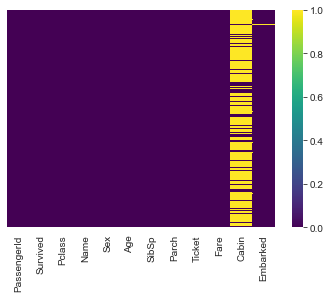

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### now dropping the unnecessary columns

- dropping passengerid as it is just the serial number 
- dropping name as it is a categorical feature and it has no such importance in any mathematical modelling
- dropping cabin due to lots of null values
- dropping ticket as it is a categorical feture which is indirectly related to fare, embarked and pclass

In [22]:
df.drop(['PassengerId','Name','Cabin','Ticket'],inplace=True,axis=1)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### dropping remaining null values

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Feature Engineering

In [26]:
df=pd.get_dummies(df,drop_first=True)

In [27]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
df.skew()

Survived      0.484568
Pclass       -0.636998
Age           0.546718
SibSp         3.691058
Parch         2.745160
Fare          4.801440
Sex_male     -0.625625
Embarked_Q    2.944406
Embarked_S   -1.006192
dtype: float64

#### as only fare and age are numerical, and there is some skewness in Fare, we may need to remove it

<AxesSubplot:xlabel='Fare', ylabel='Density'>

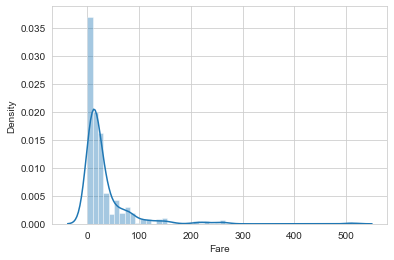

In [29]:
sns.distplot(df.Fare)

<AxesSubplot:ylabel='Fare'>

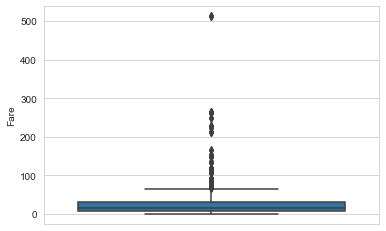

In [30]:
sns.boxplot(y=df.Fare)

In [31]:
df[df['Fare']>300]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
258,1,1,35.0,0,0,512.3292,0,0,0
679,1,1,36.0,0,1,512.3292,1,0,0
737,1,1,35.0,0,0,512.3292,1,0,0


#### as the data shows, skewness is because of these outliers, so we should remove them

In [32]:
df=df[df['Fare']<300]

In [33]:
df.shape

(886, 9)

In [34]:
df.Fare.skew()

3.2041367038895507

In [35]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### data scaling

In [36]:
scale=MinMaxScaler()
x=scale.fit_transform(df.drop('Survived',axis=1))
x=pd.DataFrame(x)

In [37]:
y=df['Survived']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=15,stratify=y)

### Model development

### Logistic regression

In [39]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(lr,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8082706766917294
confusion matrix 
 [[148  17]
 [ 34  67]]
cross validation scores  [0.78089888 0.8079096  0.78531073 0.76836158 0.81355932]
mean score  0.7912080238684696


- model accuracy is good and is also validated by cross validation(~80%)
- false dead = 34(no. of people which were actually alive but predicted dead)
- false alive = 17(no. of people which were actually dead but predicted alive)

### Decision Tree

In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(dt,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.7556390977443609
confusion matrix 
 [[134  31]
 [ 34  67]]
cross validation scores  [0.7752809  0.79661017 0.80225989 0.74011299 0.79661017]
mean score  0.7821748238430775


#### decision tree didnt work very well

### Support vector classifier

In [41]:
sv=SVC(probability=True)   #probability is set true to run cross_val_score on voting classifier with soft voting
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(sv,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8157894736842105
confusion matrix 
 [[159   6]
 [ 43  58]]
cross validation scores  [0.80337079 0.81920904 0.83050847 0.79661017 0.81355932]
mean score  0.8126515584333143


- SVC worked better than logistic regression and Decision tree
- although false dead has increased

### K nearest neighbours

In [42]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(knn,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8157894736842105
confusion matrix 
 [[147  18]
 [ 31  70]]
cross validation scores  [0.79775281 0.78531073 0.80225989 0.81920904 0.82485876]
mean score  0.805878245413572


#### almost similar result as logistic regression

### Random forest

In [43]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(rf,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8082706766917294
confusion matrix 
 [[143  22]
 [ 29  72]]
cross validation scores  [0.7752809  0.79661017 0.8700565  0.77966102 0.84180791]
mean score  0.8126832984193486


- not much improvement from before

### Ada Boost Classifier

In [44]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(adb,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8120300751879699
confusion matrix 
 [[142  23]
 [ 27  74]]
cross validation scores  [0.76966292 0.81920904 0.79096045 0.82485876 0.83615819]
mean score  0.8081698724052562


#### same result as random forest

### Gradient boosting classifier

In [74]:
gdb=GradientBoostingClassifier(random_state=42)
gdb.fit(x_train,y_train)
y_pred=gdb.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(gdb,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8421052631578947
confusion matrix 
 [[153  12]
 [ 30  71]]
cross validation scores  [0.79775281 0.81920904 0.85310734 0.81355932 0.86440678]
mean score  0.829607058972894


#### gradient boost worked better than all other classifiers

### Voting classifier- hard voting

In [46]:
vc=VotingClassifier(estimators=[('lr1',lr),('dt1',dt),('sv1',sv),('knn1',knn),('rf1',rf),('adb1',adb),('gdb1',gdb)])
vc.fit(x_train,y_train)
y_pred=vc.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(vc,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8421052631578947
confusion matrix 
 [[154  11]
 [ 31  70]]
cross validation scores  [0.82022472 0.83050847 0.83050847 0.78531073 0.85875706]
mean score  0.825061892972767


#### voting classifier worked pretty well but not better than gradient boost

### Voting classifier- soft voting

In [47]:
vc1=VotingClassifier(estimators=[('lr1',lr),('dt1',dt),('sv1',sv),('knn1',knn),('rf1',rf),('adb1',adb),('gdb1',gdb)],voting='soft')
vc.fit(x_train,y_train)
y_pred=vc.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(vc1,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8383458646616542
confusion matrix 
 [[153  12]
 [ 31  70]]
cross validation scores  [0.82022472 0.83615819 0.86440678 0.79096045 0.84180791]
mean score  0.8307116104868915


#### soft voting worked similar to hard voting

### from all the algorithms, gradient boost worked pretty well

### now lets try some hyperparameter tuning to improve model accuracy

In [98]:
para={'n_estimators':[100,150,300],
      'random_state':[42,]
     }

gdb_reg=GridSearchCV(estimator=gdb,
                     param_grid=para,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gdb_reg.fit(x_train,y_train)
print('best score ',gdb_reg.best_score_)
print('best parameters \n',gdb_reg.best_params_)

best score  0.835483870967742
best parameters 
 {'n_estimators': 150, 'random_state': 42}


In [100]:
gdb1=GradientBoostingClassifier(n_estimators=150,random_state=42)

gdb1.fit(x_train,y_train)
y_pred=gdb1.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
score=cross_val_score(gdb1,x,y,cv=5)
print('cross validation scores ', score)
print('mean score ',score.mean())

accuracy score  0.8421052631578947
confusion matrix 
 [[152  13]
 [ 29  72]]
cross validation scores  [0.79775281 0.82485876 0.85875706 0.81355932 0.86440678]
mean score  0.8318669459785438


### the mean accuracy score has improved a little bit

### Now we need to train our model on complete data

In [102]:
gdb1.fit(x,y)

GradientBoostingClassifier(n_estimators=150, random_state=42)

### saving the model

In [103]:
joblib.dump(gdb1,'titanic.pkl')

['titanic.pkl']

### loading the model

In [105]:
model=joblib.load('titanic.pkl')
y_pred=model.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))

accuracy score  0.8947368421052632
confusion matrix 
 [[158   7]
 [ 21  80]]
